In [1]:
##• Import the data and create a dataframe whcih consists of the following columns of interest: ’title’,
##’year’, ’critic score’, ’people score’, ’total reviews’, ’total ratings’, ’rating’, ’type’, ’original language’,
##’director’, ’release date (theaters)’, ’runtime’

In [2]:
#import of pandas and numpy
import pandas as pd
import numpy as np

In [3]:
#import dataset
tomatoes_raw_data = pd.read_csv("Datasets/rotten_tomatoes_top_movies.csv")
#check the names of the columns
for x in tomatoes_raw_data:
    print(x)



Unnamed: 0
title
year
synopsis
critic_score
people_score
consensus
total_reviews
total_ratings
type
rating
genre
original_language
director
producer
writer
release_date_(theaters)
release_date_(streaming)
box_office_(gross_usa)
runtime
production_co
sound_mix
aspect_ratio
view_the_collection
crew
link


In [4]:
# new dataframe 
tomatoes_data = tomatoes_raw_data[["title","year","critic_score","people_score","total_reviews","total_ratings","rating","type","original_language","director","release_date_(theaters)","runtime"]].copy()



In [5]:
tomatoes_data[tomatoes_data.title=="Avengers: Endgame"]

,title,year,critic_score,people_score,total_reviews,total_ratings,rating,type,original_language,director,release_date_(theaters),runtime
1,Avengers: Endgame,2019,94,90.0,538,"50,000+",PG-13 (Sequences of Sci-Fi Violence|Action|Som...,Action & Adventure,English,"Anthony Russo, Joe Russo","Apr 26, 2019 wide",3h 1m
603,Avengers: Endgame,2019,94,90.0,538,"50,000+",PG-13 (Sequences of Sci-Fi Violence|Action|Som...,Drama,English,"Anthony Russo, Joe Russo","Apr 26, 2019 wide",3h 1m
1201,Avengers: Endgame,2019,94,90.0,538,"50,000+",PG-13 (Sequences of Sci-Fi Violence|Action|Som...,Science Fiction & Fantasy,English,"Anthony Russo, Joe Russo","Apr 26, 2019 wide",3h 1m


In [6]:
#Becuase of multiple entries of same movie as the example "Avengers: Endgame" 
# Gonna drop all but the last from the dataset to get the real mean of total_reviews
# Used the subset runtime, title and year as highly unlikly that there are two of the same movies 
# with the same name, runtime published in the same year.
tomatoes_data = tomatoes_data.drop_duplicates(
  subset = ["title","year", "runtime"],
  keep = 'last').reset_index(drop = True)

#check to see that all went as planned
tomatoes_data[tomatoes_data.title=="Avengers: Endgame"]

,title,year,critic_score,people_score,total_reviews,total_ratings,rating,type,original_language,director,release_date_(theaters),runtime
603,Avengers: Endgame,2019,94,90.0,538,"50,000+",PG-13 (Sequences of Sci-Fi Violence|Action|Som...,Science Fiction & Fantasy,English,"Anthony Russo, Joe Russo","Apr 26, 2019 wide",3h 1m


In [7]:
#What is the average number of reviews for the movies included in the dataset (total reviews column)?
mean_tomato= tomatoes_data.total_reviews.mean()
print(mean_tomato)



137.4662638469285


In [8]:
# filter your data for movies that have at least as many reviews as this average value.
tomatoes_data = tomatoes_data[tomatoes_data.total_reviews>=mean_tomato]
tomatoes_data


,title,year,critic_score,people_score,total_reviews,total_ratings,rating,type,original_language,director,release_date_(theaters),runtime
0,Mission: Impossible Rogue Nation,2015,94,87.0,325,"50,000+",PG-13 (Sequences of Action & Violence|Brief Pa...,Action & Adventure,English,Christopher McQuarrie,"Jul 31, 2015 wide",2h 11m
1,John Wick: Chapter 3 -- Parabellum,2019,89,86.0,349,"25,000+",R (Some Language|Pervasive Strong Violence),Action & Adventure,English,Chad Stahelski,"May 17, 2019 wide",2h 11m
2,The Peanut Butter Falcon,2019,94,96.0,217,"2,500+ Verified",PG-13 (Smoking|Language Throughout|Some Violen...,Action & Adventure,English,"Tyler Nilson, Michael Schwartz","Aug 23, 2019 wide",1h 36m
4,Catch Me if You Can,2002,96,89.0,202,"250,000+",PG-13 (Some Sexual Content|Brief Language),Action & Adventure,English,Steven Spielberg,"Dec 25, 2002 wide",2h 20m
5,Finding Dory,2016,94,84.0,332,"100,000+",PG (Mild Thematic Elements),Animation,English,Andrew Stanton,"Jun 17, 2016 wide",1h 43m
...,...,...,...,...,...,...,...,...,...,...,...,...
982,A Million Ways to Die in the West,2014,33,41.0,211,"50,000+",R (Language Throughout|Drug Material|Some Viol...,Western,English,Seth MacFarlane,"May 30, 2014 wide",1h 55m
983,The Lone Ranger,2013,30,51.0,247,"25,000+",PG-13 (Some Suggestive Material|Seq of Intense...,Western,English,Gore Verbinski,"Jul 3, 2013 wide",2h 29m
984,The Alamo,2004,29,45.0,159,"10,000+",PG-13 (Sustained Battle Sequences),Western,English,John Lee Hancock,NaN,2h 17m
986,The Dark Tower,2017,16,45.0,275,"25,000+",PG-13 (Sequences of Gun Violence|Action|Themat...,Western,English,Nikolaj Arcel,"Aug 4, 2017 wide",1h 35m


In [9]:
# How many rows do you have in this data in which the movie is more than 3 hours long?
# 
tomatoes_data.runtime.str.contains('[3-9]h').sum()


3

In [10]:
# Before the following tasks, look at the type column, choose your favourite type,
# and filter your data to
# include only movies of that type. Perform the following tasks on this filtered data.
print(tomatoes_data.type.unique())

['Action & Adventure' 'Animation' 'Art House & International' 'Comedy'
 'Documentary' 'Drama' 'Horror' 'Kids & Family'
 'Musical & Performing Arts' 'Mystery & Suspense' 'Romance'
 'Science Fiction & Fantasy' 'Special Interest' 'Sports & Fitness'
 'Television' 'Western']


In [11]:
## I like Horror the most
tomatoes_data = tomatoes_data[tomatoes_data.type=="Horror"]
tomatoes_data

,title,year,critic_score,people_score,total_reviews,total_ratings,rating,type,original_language,director,release_date_(theaters),runtime
227,Hereditary,2018,89,67.0,379,"10,000+",R (Disturbing Images|Brief Graphic Nudity|Drug...,Horror,English,Ari Aster,"Jun 8, 2018 wide",2h 7m
228,Let the Right One In,2008,98,90.0,191,"50,000+",R (Brief Nudity|Bloody Violence|Disturbing Ima...,Horror,Swedish,Tomas Alfredson,"Oct 24, 2008 limited",1h 54m
229,It Follows,2014,95,66.0,261,"25,000+",R (Graphic Nudity|Disturbing Violent Content|L...,Horror,English,David Robert Mitchell,"Mar 27, 2015 wide",1h 41m
232,The Witch,2015,90,59.0,328,"25,000+",R (Graphic Nudity|Disturbing Violent Content),Horror,English,Robert Eggers,"Feb 19, 2016 wide",1h 32m
233,Relic,2020,92,49.0,226,500+,R (Some Horror Violence|Language|Disturbing Im...,Horror,English,Natalie Erika James,"Jul 10, 2020 limited",1h 29m
235,Ready or Not,2019,88,78.0,307,"5,000+ Verified",R (Language Throughout|Bloody Images|Some Drug...,Horror,English,"Matt Bettinelli-Olpin, Tyler Gillett","Aug 21, 2019 wide",1h 35m
237,Drag Me to Hell,2009,92,62.0,269,"250,000+",PG-13 (Language|Disturbing Images|Sequences of...,Horror,English,Sam Raimi,"May 29, 2009 wide",1h 39m
241,Midsommar,2019,83,63.0,395,"5,000+ Verified",R (Drug Use|Disturbing Ritual Violence|Strong ...,Horror,English,Ari Aster,"Aug 30, 2019 wide",2h 25m
257,The Host,2006,93,72.0,155,"100,000+",R (Language|Creature Violence),Horror,Korean,Joon-ho Bong,"Mar 9, 2007 limited",1h 59m
260,It Comes at Night,2017,87,44.0,252,"10,000+",R (Language|Disturbing Images|Violence),Horror,English,Trey Edward Shults,"Jun 9, 2017 wide",1h 37m


In [12]:
#For which movie in this dataset you can find the largest difference between the critics and viewers
#evaluation (critic score and people score)?
data_abs = {"title": tomatoes_data.title, "Abs": (tomatoes_data.people_score-tomatoes_data.critic_score).abs()}

tomatoes_abs = pd.DataFrame(data=data_abs)
tomatoes_abs.sort_values(by='Abs', ascending=False).head(5)

,title,Abs
260,It Comes at Night,43.0
233,Relic,43.0
262,In Fabric,41.0
232,The Witch,31.0
237,Drag Me to Hell,30.0


In [13]:
# How many directors do you have in the dataset with more than one movie?
tomatoes_data.duplicated(["director"]).sum()


1

In [14]:
# Part 2
fortune_raw_data = pd.read_csv("Datasets/fortune.csv")
fortune_raw_data

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
0,Walmart,1,0.0,572754.0,13673.0,2300000.0,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,352037
1,Amazon,2,0.0,469822.0,33364.0,1608000.0,Retailing,Seattle,WA,no,no,no,yes,2.0,Andrew R. Jassy,www.amazon.com,AMZN,1202717
2,Apple,3,0.0,365817.0,94680.0,154000.0,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,www.apple.com,AAPL,2443962
3,CVS Health,4,0.0,292111.0,7910.0,258000.0,Health Care,Woonsocket,RI,no,no,yes,yes,4.0,Karen Lynch,https://www.cvshealth.com,CVS,125204
4,UnitedHealth Group,5,0.0,287597.0,17285.0,350000.0,Health Care,Minnetonka,MN,no,no,no,yes,5.0,Andrew P. Witty,www.unitedhealthgroup.com,UNH,500468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Vizio Holding,996,0.0,2124.0,-39.4,800.0,Industrials,Irvine,CA,no,yes,no,no,,William W. Wang,https://www.vizio.com,VZIO,1705.1
996,1-800-Flowers.com,997,0.0,2122.2,118.7,4800.0,Retailing,Jericho,NY,no,no,no,yes,,Christopher G. McCann,https://www.1800flowers.com,FLWS,830
997,Cowen,998,0.0,2112.8,295.6,1534.0,Financials,New York,NY,no,no,no,yes,,Jeffrey Solomon,https://www.cowen.com,COWN,1078
998,Ashland,999,0.0,2111.0,220.0,4100.0,Chemicals,Wilmington,DE,no,no,no,yes,,Guillermo Novo,https://www.ashland.com,ASH,5601.9


In [15]:
# After importing the data, check how many new companies are in the data (companies that were not
# present the previous year, using the newcomer column).
len(fortune_raw_data[fortune_raw_data.newcomer=="yes"])


30

In [16]:
#What is the rank of the best newcomer company 
fortune_raw_data[fortune_raw_data.newcomer=="yes"].sort_values(by='rank', ascending=True).head(1)

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
170,Cleveland-Cliffs,171,0.0,20444.0,2988.0,26000.0,Materials,Cleveland,OH,yes,no,no,yes,,C. Lourenco Goncalves,https://www.clevelandcliffs.com,CLF,16891.2


In [17]:
 #Is there any newcomer company in the top 100 companies based on profit? 
top_100_profit= fortune_raw_data.sort_values(by='profit', ascending=False).head(100)
top_100_profit[top_100_profit.newcomer=="yes"]
   

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
194,Moderna,195,0.0,18471.0,12202.0,2700.0,Health Care,Cambridge,MA,yes,no,no,yes,,Stephane Bancel,https://www.modernatx.com,MRNA,69424.3


In [43]:
# Check the correlation between revenue and number of employees. 
data_cor= {"company": fortune_raw_data.company,"rev_per_emp": (fortune_raw_data["revenue"]/fortune_raw_data["num. of employees"]),"profit_per_emp": (fortune_raw_data["profit"]/fortune_raw_data["num. of employees"]), "employees":fortune_raw_data["num. of employees"], "revenue":fortune_raw_data["revenue"], "profit":fortune_raw_data["profit"] }
small_data = pd.DataFrame(data=data_cor)
small_data = small_data.sort_values(by="employees", ascending=True)
# drop nan values
small_data = small_data[small_data["employees"].notna()]
small_data = small_data[small_data["profit"].notna()]
# remove Wallmart and amazon from the data, as they are outliers.
small_data = small_data[small_data["company"].str.contains("Walmart") == False]
small_data = small_data[small_data["company"].str.contains("Amazon") == False]
small_data

,company,rev_per_emp,profit_per_emp,employees,revenue,profit
855,Host Hotels & Resorts,18.062500,-0.068750,160.0,2890.0,-11.0
866,Annaly Capital Management,16.585965,13.976023,171.0,2836.2,2389.9
445,A-Mark Precious Metals,21.939481,0.459942,347.0,7613.0,159.6
710,Ventas,8.820276,0.112903,434.0,3828.0,49.0
629,Welltower,10.220043,0.724353,464.0,4742.1,336.1
...,...,...,...,...,...,...
33,United Parcel Service,0.242644,0.032149,400945.0,97287.0,12890.0
20,Kroger,0.328305,0.003940,420000.0,137888.0,1655.0
31,Target,0.235567,0.015436,450000.0,106005.0,6946.0
38,FedEx,0.173469,0.010808,484000.0,83959.0,5231.0


0.5895476546924407


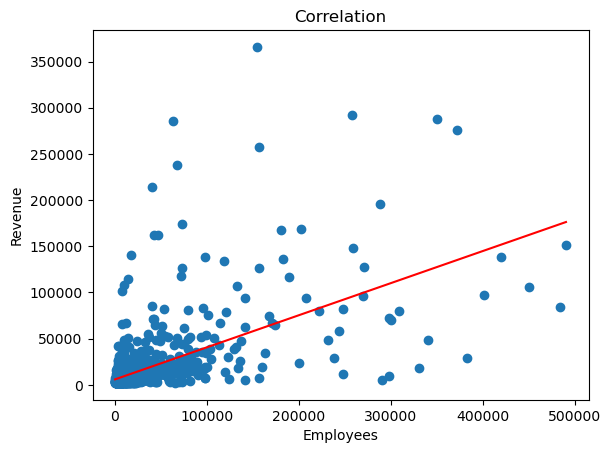

In [44]:
import matplotlib.pyplot as plt
# Pearson correlation coefficient 
cor_emp_rev = np.corrcoef(small_data["employees"],small_data["revenue"])
print(cor_emp_rev[0,1])
plt.title("Correlation")
plt.xlabel('Employees')
plt.ylabel('Revenue')
x = small_data["employees"]
y = small_data["revenue"]
plt.scatter(x,y)
plt.plot(np.unique(x),np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

Based on the results, what is your opinion, does the size of the company in terms of employees impact revenue?

Answer: The pearson correlation is bigger than 0.49 so there is a high degeree of correlation.


0.4130132190667325


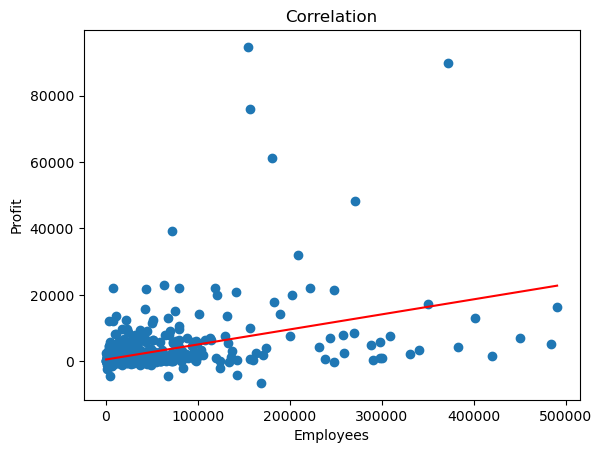

In [45]:
# Pearson correlation coefficient 
cor_emp_prof = np.corrcoef(small_data["employees"],small_data["profit"])
print(cor_emp_prof[0,1])
plt.title("Correlation")
plt.xlabel('Employees')
plt.ylabel('Profit')
x = small_data["employees"]
y = small_data["profit"]
plt.scatter(x,y)
plt.plot(np.unique(x),np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

If you calculate the correlation between profit and number of employees, would you make the same observation?

Answer: there is a moderate degree of correlation as the pearsons correlation is higher than 0.3 but lower than 0.5

In [46]:
#How many companies do you find on the list that made losses, even though based on revenue they are in the top 1000?
print(len(fortune_raw_data[fortune_raw_data.profit<0]))

#What is the biggest loss (i.e., most negative profit) that you find in the data,
#and in what sector is the company that made that loss
fortune_raw_data[fortune_raw_data.profit<0].sort_values(by='profit', ascending=True).head(1)



114


,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap,revenue_group
47,General Electric,48,-10.0,74196.0,-6520.0,168000.0,Industrials,Boston,MA,no,no,no,no,38.0,H. Lawrence Culp Jr.,www.ge.com,GE,73458,Very High


Create a categorical version of the revenue column with 4 groups: (i) values between 0 and 3500, (ii)
values between 3500 and 6380, (iii) values between 6380 and 14620, and (iv) values between 14620
and 1000000. Label the groups [’Low’, ’Medium’, ’High’, ’Very High’]. In which category do you find
the most companies?


In [47]:
group_names = ["Low", "Medium", "High", "Very High"]
revenue_bins = [-0.001,3500,6380,14620,1000000]
fortune_raw_data["revenue_group"]= pd.cut(fortune_raw_data.revenue,revenue_bins, labels=group_names)
fortune_raw_data.revenue_group.value_counts()

Low          250
Medium       250
High         250
Very High    250
Name: revenue_group, dtype: int64

In [48]:
#Which sector has the highest average revenue?
fortune_raw_data.groupby("sector").mean().sort_values(by='revenue', ascending=False).head(2)


,rank,rank_change,revenue,profit,num. of employees
sector,,,,,
Telecommunications,216.000000,-22.888889,58882.544444,8318.612500,76404.444444
Food & Drug Stores,325.777778,-3.222222,49665.166667,1114.833333,148315.000000
